In [12]:
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, '/Users/szczekulskij/side_projects/research_projects/long-term-analysis-of-pws')
from src.generate_df import get_data_df
from src.graphs import graph_agg_metric_over_nr_sessions, graph_based_on_time_bucket, plot_fig5A_graphs, plot_fig5B_graph
import pandas as pd
# from src.anovas import bucketed_anova
# from src.statistics import get_medians

In [3]:
df = get_data_df(metric = "total_GCE")
print("nr of patients: ", len(df.surname.unique()))
print("nr of sessions: ", len(df))
print(f"from {df.visit_nr.min()} to {df.visit_nr.max()} sessions ")

nr of patients:  55
nr of sessions:  412
from 1 to 37 sessions 


# Main graphs & stats:

In [4]:
get_medians(metric = "total_GCE", buckets_visit_nr = [2,5,10,15,20,1000], agg_type="median")

NameError: name 'get_medians' is not defined

/usr/local/lib/python3.10/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


Text(0.5, 0, 'number of laser sessions')

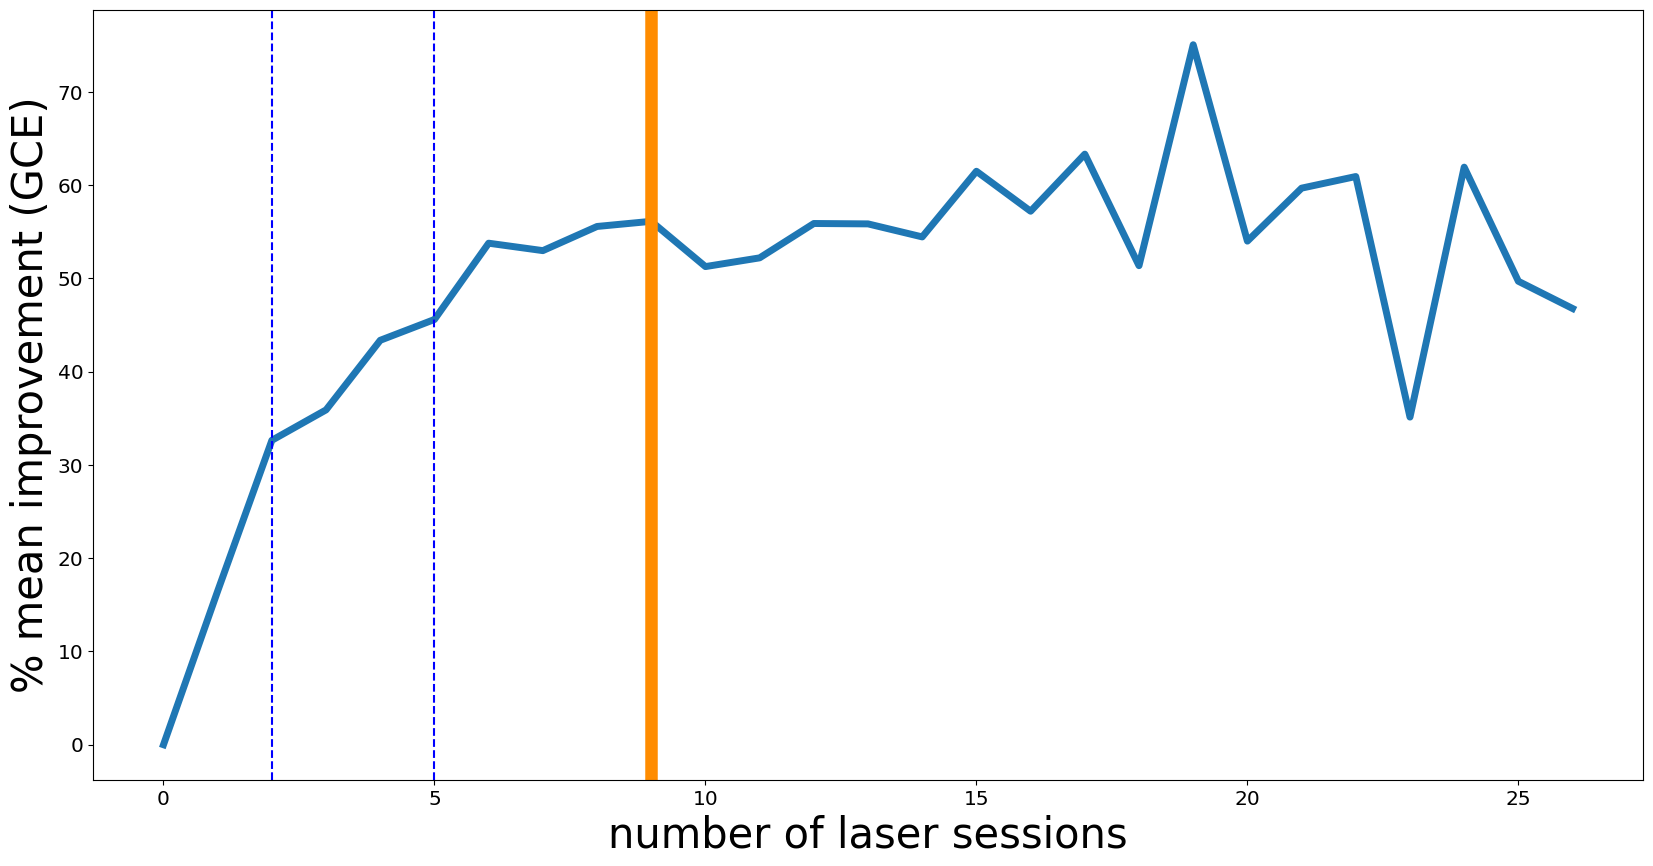

In [4]:
plt.figure(figsize=(20,10))
graph_agg_metric_over_nr_sessions("total_GCE", cut_last_x_visits = 27)
plt.axvline(x=2, color='b', linestyle='--')
plt.axvline(x=5, color='b', linestyle='--')
plt.axvline(x=9, color='darkorange', linestyle='-',  lw = 9)
plt.ylabel("% mean improvement (GCE)", size = 30)
plt.xlabel("number of laser sessions", size = 30)

In [20]:
# # print how many visits were in a given bucket 
# def print_nr_visits_per_bucket(df, buckets: list):
#     for i in range(len(buckets)-1):
#         print(f"nr of treatments in bucket {buckets[i]}-{buckets[i+1]}: ", len(df[(df.visit_nr >= buckets[i]) & (df.visit_nr < buckets[i+1])]))
# print_nr_visits_per_bucket(df, [1,3,6,10,15,])

# re-write the above to return a dataframe with appropriate column or row names signifying bucket split eg. {"1-3": 10, "4-5": 15, etc.}
# MAKE IT A DATAFRAME SO IT SHOWS UP NICELY!
def get_nr_visits_per_bucket(df, buckets: list):
    bucket_dict = {}
    for i in range(len(buckets)-1):
        bucket_dict[f"{buckets[i]}-{buckets[i+1]}"] = len(df[(df.visit_nr >= buckets[i]) & (df.visit_nr < buckets[i+1])])
    return pd.DataFrame.from_dict(bucket_dict, orient='index', columns=["nr of visits"])

data = get_nr_visits_per_bucket(df, [1,3,6,10,15,])
# update dataframe to show up nicely (eg. with shades in the background and all that)
data.style.background_gradient(cmap='gray')


,nr of visits
1-3,82
3-6,111
6-10,100
10-15,66


In [24]:
df

,surname,visit_nr,time,total_GCE,total_area_change,total_clearence_effect
0,1.Gasek,1,57,10.435942,-7.14768,16.41064
1,1.Gasek,2,958,8.725376,-5.10875,13.16172
2,1.Gasek,3,70,5.848092,8.289255,-2.66181
3,1.Gasek,4,63,30.519873,15.19709,18.0687
4,1.Gasek,5,238,29.827784,17.01644,15.43841
...,...,...,...,...,...,...
601,70.Wójcicki,5,98,57.625847,32.2171,37.485453
602,70.Wójcicki,6,84,75.286637,45.9224,54.300131
603,70.Wójcicki,7,84,69.913296,49.26,40.704134
604,70.Wójcicki,8,70,83.173308,53.8251,63.558731






anova results:
buckets: [1, 3, 6, 10, 15]
p_value: 2.672068635067671e-16

statistics between 1 - 2 bucket and 3 - 5 bucket
means: 24.95 vs 41.41
p-value: 0.0

statistics between 3 - 5 bucket and 6 - 9 bucket
means: 41.41 vs 54.43
p-value: 0.0

statistics between 6 - 9 bucket and 10 - 14 bucket
means: 54.43 vs 53.55
p-value: 0.597

[(-23.58, -9.33), (-19.58, -6.47), (-5.95, 7.71)]


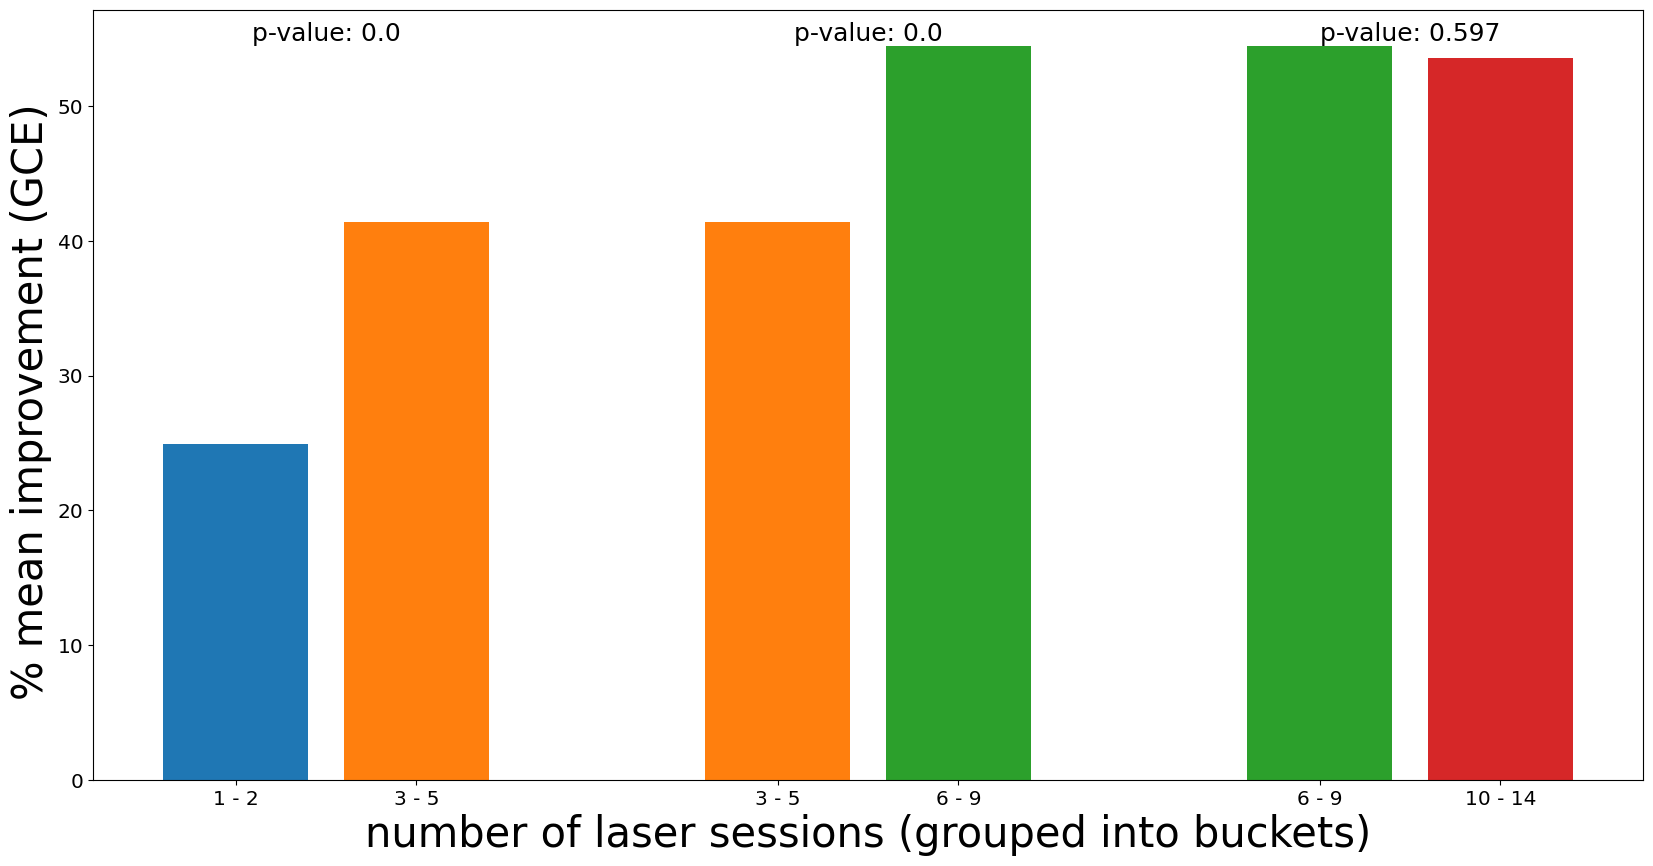

In [5]:
plt.figure(figsize=(20,10))
plt.ylabel("% mean improvement (GCE) ", size = 30)
plt.xlabel("number of laser sessions (grouped into buckets)", size = 30)
bucketed_anova(
    bucket_column = "visit_nr",
    metric = "total_GCE",
    buckets = [1,3,6,10,15,],
    ttest_type = "less",
    p_value_text_height = 54.50
)

buckets:  [0, 90, 180, 270]
['0 - 90', '90 - 180', '180 - 270', '270+']


,bucket,visits_per_bucket
0,0 - 90,255
1,90 - 180,41
2,180 - 270,21
3,270+,15


Text(0, 0.5, '% mean improvement (GCE)\ninbetween two consecutive visits')

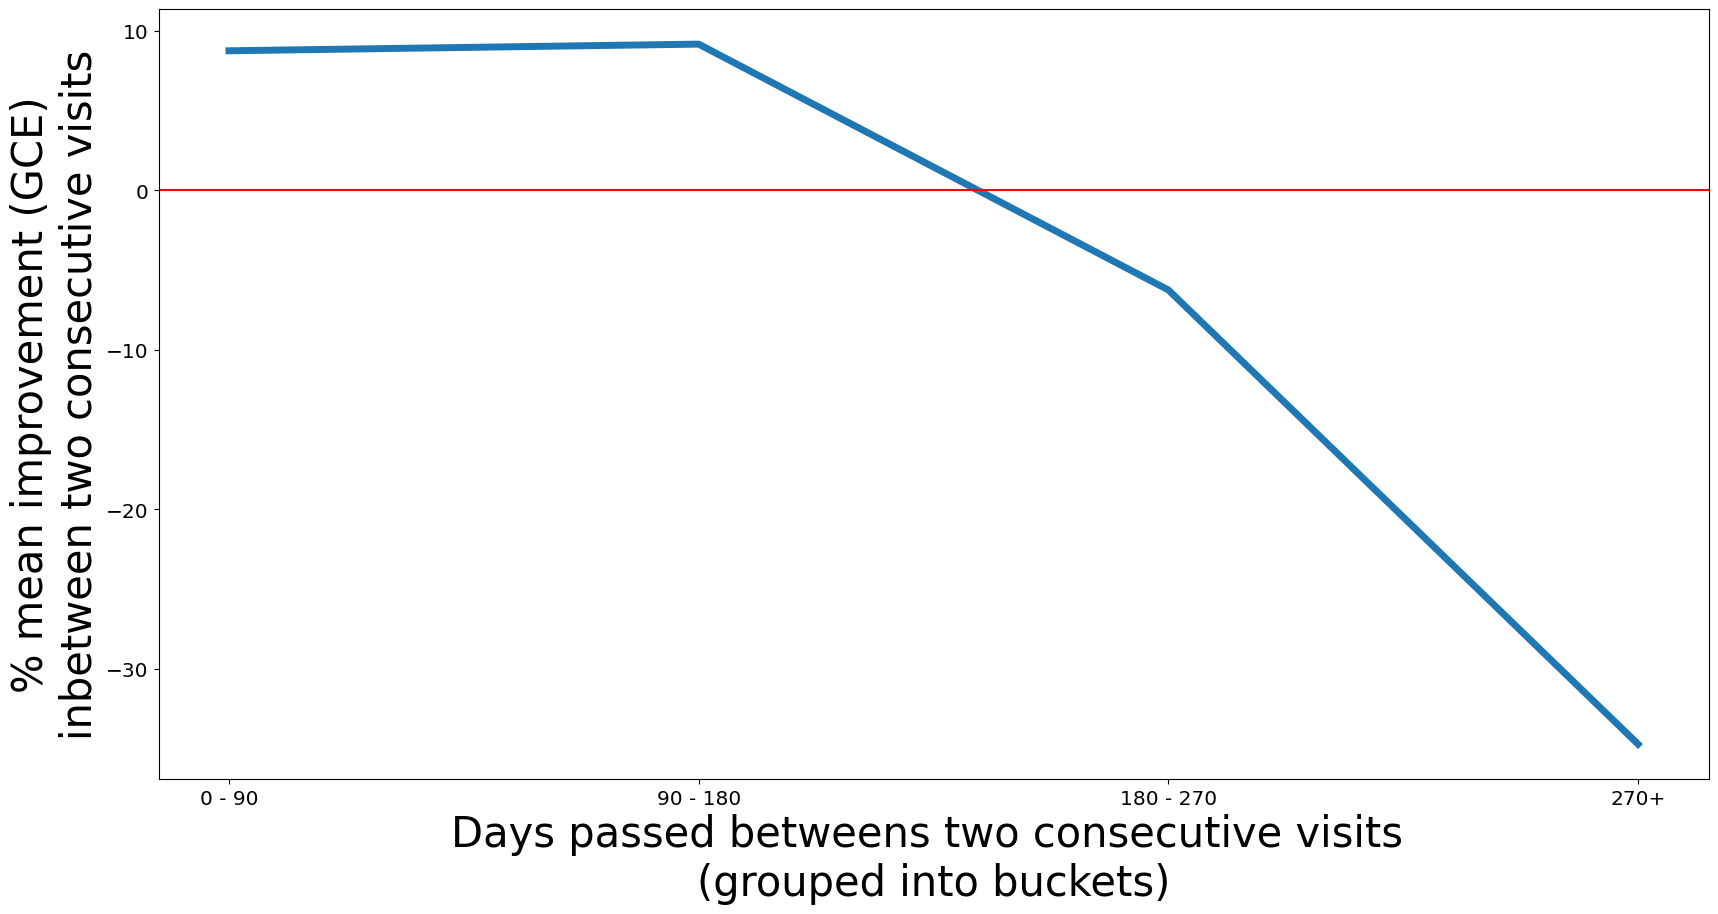

In [6]:
plt.figure(figsize=(20,10))
graph_based_on_time_bucket("inbetween_GCE", buckets_nr = 4, increment = 90)
plt.xlabel("Days passed betweens two consecutive visits \n(grouped into buckets)", size = 30)
plt.ylabel("% mean improvement (GCE)\ninbetween two consecutive visits", size = 30)





anova results:
buckets: [0, 90, 180, 270, 10000]
p_value: 1.99238094142645e-08

statistics between 0 - 89 bucket and 90 - 179 bucket
means: 8.74 vs 9.16
p-value: 0.544

statistics between 90 - 179 bucket and 180 - 269 bucket
means: 9.16 vs -6.25
p-value: 0.013

statistics between 180 - 269 bucket and 270+ bucket
means: -6.25 vs -34.7
p-value: 0.057

[(-7.64, 6.8), (-0.23, 31.03), (-13.04, 69.95)]


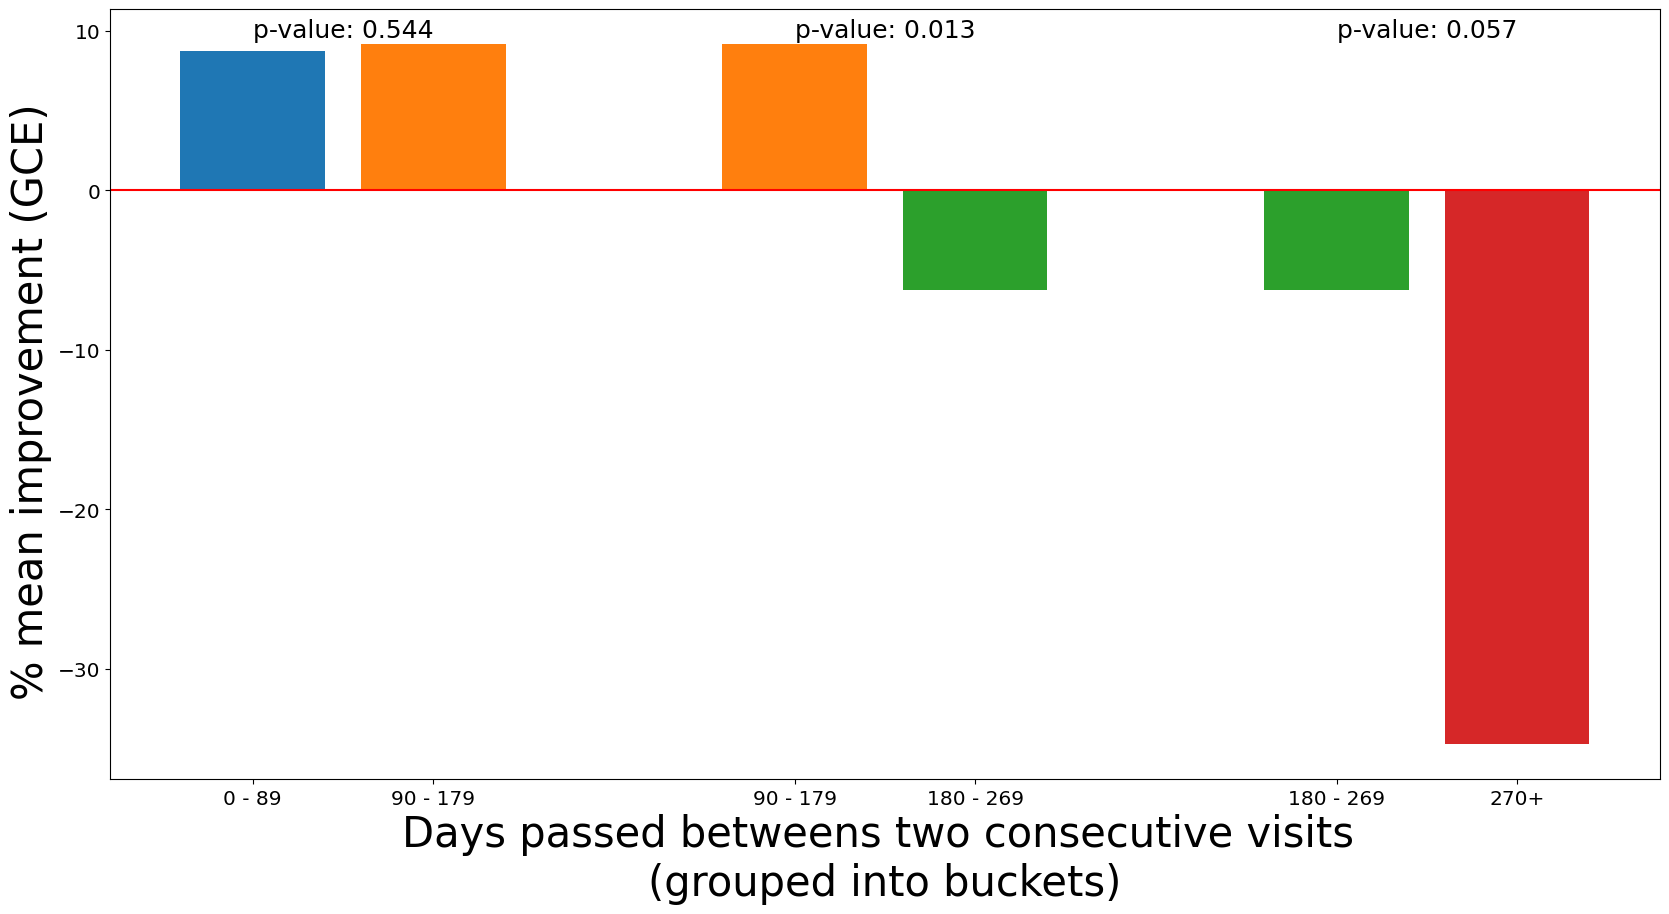

In [7]:
plt.figure(figsize=(20,10))
plt.ylabel("% mean improvement (GCE) ", size = 30)
plt.xlabel("Days passed betweens two consecutive visits \n(grouped into buckets)", size = 30)
plt.axhline(y=0, color='r', linestyle='-')
bucketed_anova(
    bucket_column = "time",
    metric = "inbetween_GCE",
    buckets = [0,90,180,270,10000],
    ttest_type = "greater",
    p_value_text_height = 9.3,
    last_bucket_label = "270+"
)

## Figure 6 graphs:

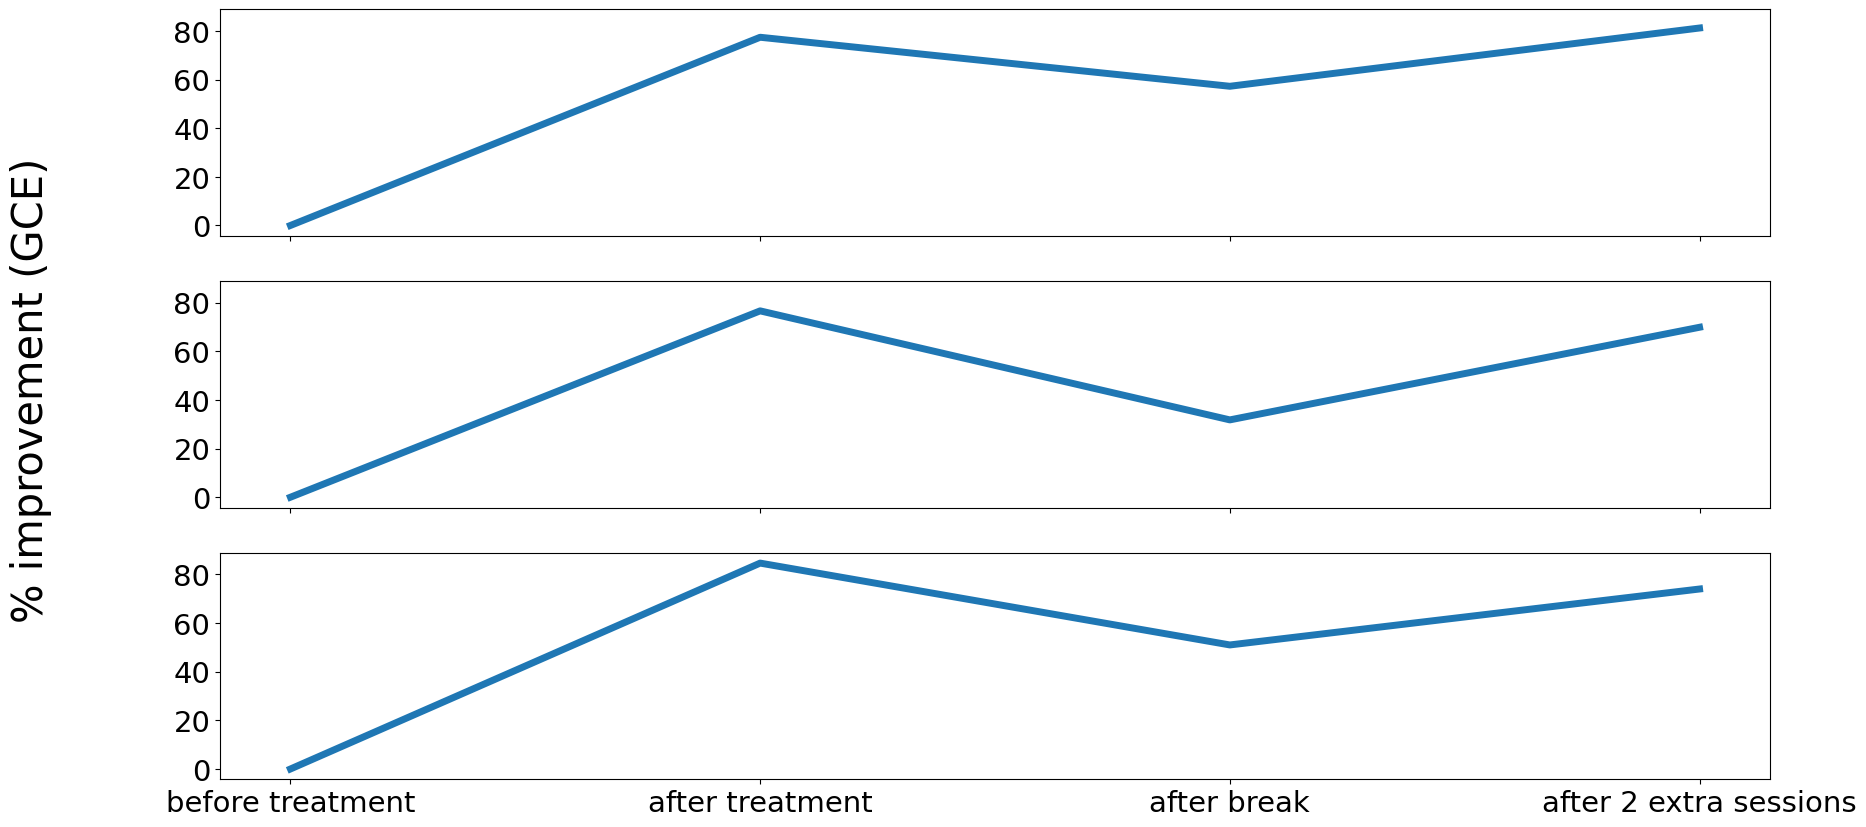

In [8]:
plot_fig5A_graphs()

% mean improvement (GCE) before treatment:  0
% mean improvement (GCE) after treatment:  79.55
% mean improvement (GCE) after break:  46.67
% mean improvement (GCE) after 2 extra visits:  75.02
% mean relative improvement (GCE) after 2 extra visits:  168.92


Text(0, 0.5, '% mean improvement (GCE)')

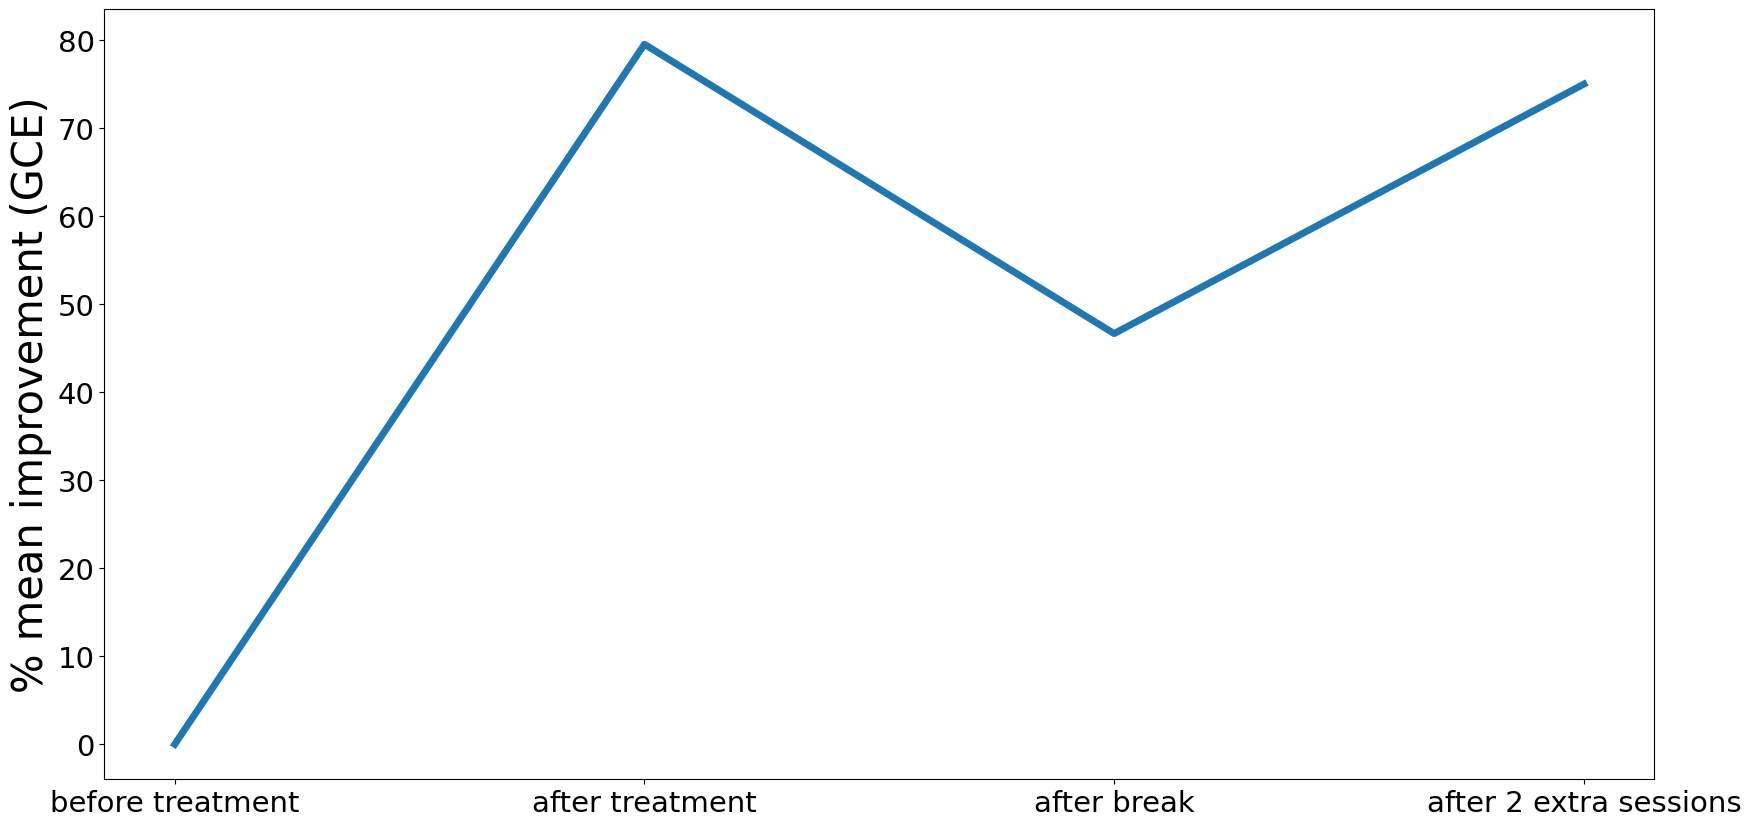

In [9]:
plt.figure(figsize=(20,10))
plot_fig5B_graph()
plt.ylabel("% mean improvement (GCE)", size = 30)

## Extra new addition
Graph correlation between the improvement in color vs improvement in the area of the lesion - first in 2d and then in 3d

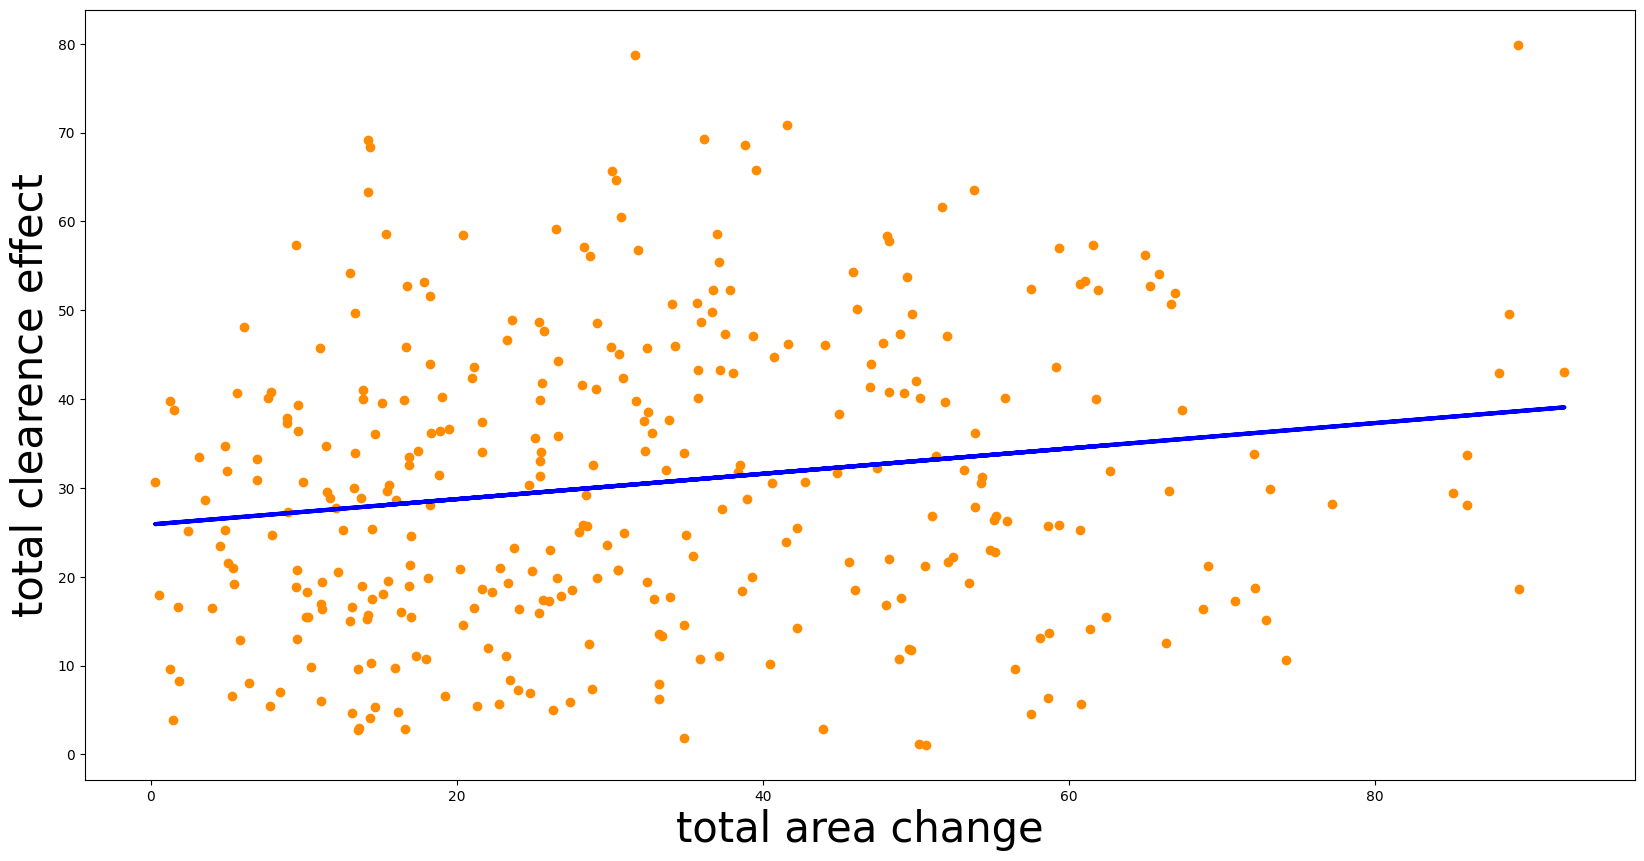

In [16]:
df_ = df.copy(deep = True)
# remove all outliers - remove all values below 0
df_ = df_[df_["total_area_change"] > 0]
df_ = df_[df_["total_clearence_effect"] > 0]



area_change = df_["total_area_change"]
clearence_effect = df_["total_clearence_effect"]


plt.figure(figsize=(20,10))
plt.scatter(area_change, clearence_effect, color = "darkorange")
plt.xlabel("total area change", size = 30)
plt.ylabel("total clearence effect", size = 30)




# fit in lr line
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = area_change.values.reshape(-1,1)
Y = clearence_effect.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X,Y)

Y_pred = lr.predict(X)
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.show()

In [27]:
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def plot_3d(elev=0., azim=0.):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')

    X = area_change.values.reshape(-1,1)
    Y = clearence_effect.values.reshape(-1,1)
    Z = df_["visit_nr"].values.flatten()  # Flatten Z to make it 1D

    # Fit a line in 3D
    lr = LinearRegression()
    lr.fit(np.hstack([X, Y]), Z)  # Concatenate X and Y along the second axis

    # Generate coordinates for the fitted line
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = np.linspace(Y.min(), Y.max(), 100)
    z_line = lr.predict(np.hstack([x_line.reshape(-1,1), y_line.reshape(-1,1)]))

    ax.scatter(X, Y, Z, c='r', marker='o')
    ax.plot(x_line, y_line, z_line, 'b-')

    ax.view_init(elev, azim)
    ax.set_xlabel('total area change')
    ax.set_ylabel('total clearence effect')
    ax.set_zlabel('visit nr')
    plt.show()

widgets.interact(plot_3d, elev=(-90, 90), azim=(-180, 180))

interactive(children=(IntSlider(value=0, description='elev', max=90, min=-90), IntSlider(value=0, description=…

<function __main__.plot_3d(elev=0.0, azim=0.0)>